In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from random_codes import MLPEstimator, CustomPipeline
from utils import plot_train_validation_loss_per_epoch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sklearn.set_config(enable_metadata_routing=True)

In [3]:
X, y = load_digits(return_X_y=True,
                   n_class=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [4]:
model_example = MLPEstimator(task="classification",
                             epochs=200).set_fit_request(val_data=True)

pipeline = CustomPipeline([StandardScaler()], model_example)

pipeline.fit(X_train, y_train, val_data=(X_val, y_val))

sklearn.set_config(enable_metadata_routing=False)

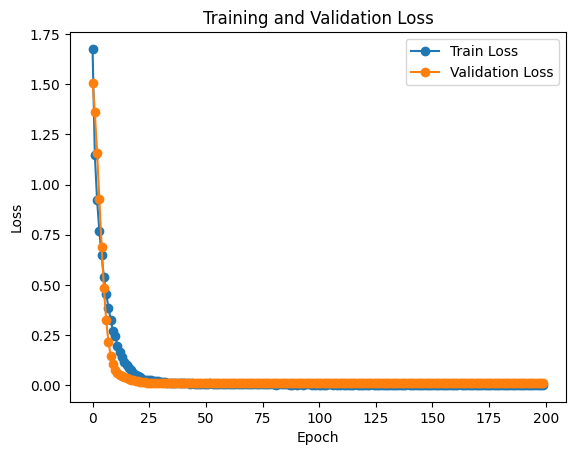

In [5]:
fig, ax = plt.subplots()
plot_train_validation_loss_per_epoch(model_example.train_loss,
                                     model_example.validation_loss,
                                     ax)
plt.show()